# Notebook III - DET script: DET curves & D-EER computing
Laurine Dargaud, June 2022 (Biometric Systems, DTU course)

= Based on course material =

**Topic: Face Morphing Attack Detection**

## IMPORTS & METHODS

In [2]:
from DET import DET
import numpy as np

from os import listdir
from os.path import isfile, join

def adjust_scores_for_DET(scores_array, scores_type):
    scores_array = np.asarray(scores_array)
    if scores_type == "similarity":
        return scores_array
    elif scores_type == "dissimilarity":
        return -scores_array
    else:
        raise ValueError(f"Unknown type of comparison scores: {scores_type}")

def compute_deer(apcer, bpcer):
    return apcer[np.argmin(abs(apcer-bpcer))]        

def print_deer(deer_dict, to_compare_dict):
    print('D-EER:')
    for expNumber, system_name in to_compare:
        deer = deer_dict[expNumber]
        print(f'- {system_name} (exp n°{expNumber}) -> {round(deer*100,3)}%')

def get_DET_comparing(to_compare, title=None, figsize=None, limits=[1e-4, .5], ticks=[1e-3, 1e-2, 5e-2, 20e-2, 40e-2], legend_loc="lower left", showRGBfromHybrid = False):
    if title == None:
        title = 'DET Curves'
    else:
        title = 'DET Curves - ' + title
    det = DET(biometric_evaluation_type='PAD', abbreviate_axes=True, plot_eer_line=True, plot_title=title)
    det.x_limits = np.array(limits)
    det.y_limits = np.array(limits)
    det.x_ticks = np.array(ticks)
    tickslabels = [str(100*v) for v in ticks]
    det.x_ticklabels = np.array(tickslabels)
    det.y_ticks = np.array(ticks)
    det.y_ticklabels = np.array(tickslabels)
    det.create_figure(figsize=figsize)
    deer = {}
    for expNumber, system_name in to_compare:
        _EXPERIMENT_PATH_ = f'data/S-MAD-Experiments/{expNumber}/'
        if not showRGBfromHybrid:
            all_files_in_exp_repo = [f for f in listdir(_EXPERIMENT_PATH_) if isfile(join(_EXPERIMENT_PATH_, f))]
            if 'mated.txt' in all_files_in_exp_repo:
                mated_scores = np.loadtxt(_EXPERIMENT_PATH_+'mated.txt', delimiter='\t')
                nonmated_scores = np.loadtxt(_EXPERIMENT_PATH_+'nonmated.txt', delimiter='\t')
            else:
                mated_scores = np.loadtxt(_EXPERIMENT_PATH_+'matedRGB.txt', delimiter='\t')
                nonmated_scores = np.loadtxt(_EXPERIMENT_PATH_+'nonmatedRGB.txt', delimiter='\t')
            scores_type = "dissimilarity"
            x, y = det.plot(tar=adjust_scores_for_DET(mated_scores, scores_type), non=adjust_scores_for_DET(nonmated_scores, scores_type), label=system_name)
            deer[expNumber] = compute_deer(x, y)
        else:
            for aSymbol in ['R','G','B','RGB']:
                mated_scores = np.loadtxt(_EXPERIMENT_PATH_+f'mated{aSymbol}.txt', delimiter='\t')
                nonmated_scores = np.loadtxt(_EXPERIMENT_PATH_+f'nonmated{aSymbol}.txt', delimiter='\t')
                scores_type = "dissimilarity"
                x, y = det.plot(tar=adjust_scores_for_DET(mated_scores, scores_type), non=adjust_scores_for_DET(nonmated_scores, scores_type), label=aSymbol)
                if aSymbol == 'RGB':
                    deer[expNumber] = compute_deer(x, y)
    det.legend_on(loc=legend_loc)
    det.show()
    return deer

## Setting Experiment: Grayscale, RGB, HSV or YCrCb decomposition?

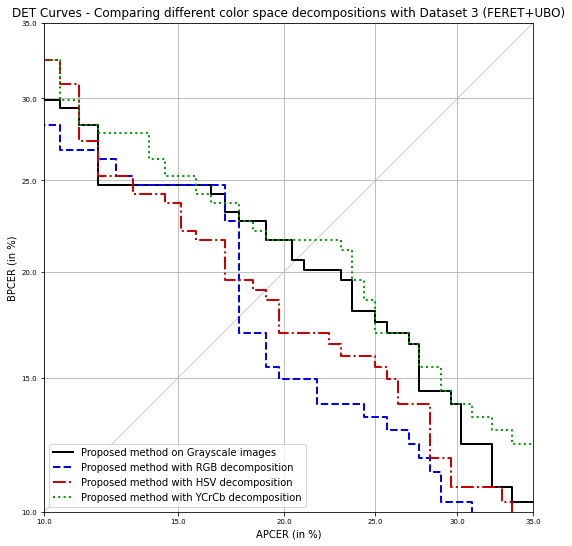

D-EER:
- Proposed method on Grayscale images (exp n°11) -> 20.395%
- Proposed method with RGB decomposition (exp n°26) -> 17.763%
- Proposed method with HSV decomposition (exp n°24) -> 19.079%
- Proposed method with YCrCb decomposition (exp n°25) -> 23.026%


In [3]:
# Grayscale or color space decomposition?
to_compare = [
    ('11','Proposed method on Grayscale images'), 
    ('26','Proposed method with RGB decomposition'),
    ('24','Proposed method with HSV decomposition'),
    ('25','Proposed method with YCrCb decomposition')
]
more_ticks=[10e-2,15e-2, 20e-2, 25e-2, 30e-2,35e-2]
deer_dict = get_DET_comparing(to_compare, 'Comparing different color space decompositions with Dataset 3 (FERET+UBO)', figsize=(9,9), ticks=more_ticks, showRGBfromHybrid = False, limits=[min(more_ticks), max(more_ticks)])
print_deer(deer_dict, to_compare)

## Experiment A - each dataset separately

**Figure for paper**

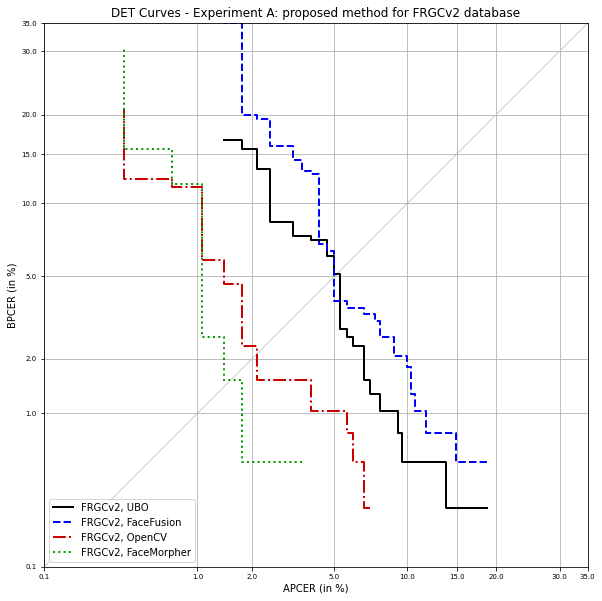

D-EER:
- FRGCv2, UBO (exp n°37) -> 4.965%
- FRGCv2, FaceFusion (exp n°42) -> 4.965%
- FRGCv2, OpenCV (exp n°53) -> 2.128%
- FRGCv2, FaceMorpher (exp n°59) -> 1.418%


In [39]:
# FRGCv2
to_compare = [
    ('37','FRGCv2, UBO'),
    ('42','FRGCv2, FaceFusion'),
    ('53','FRGCv2, OpenCV'),
    ('59','FRGCv2, FaceMorpher')
]
more_ticks=[1e-3, 1e-2, 2e-2, 5e-2, 10e-2, 15e-2, 20e-2, 30e-2, 35e-2]
deer_dict = get_DET_comparing(to_compare, 'Experiment A: proposed method for FRGCv2 database', figsize=(10,10), ticks=more_ticks, limits=[min(more_ticks),max(more_ticks)])
print_deer(deer_dict, to_compare)

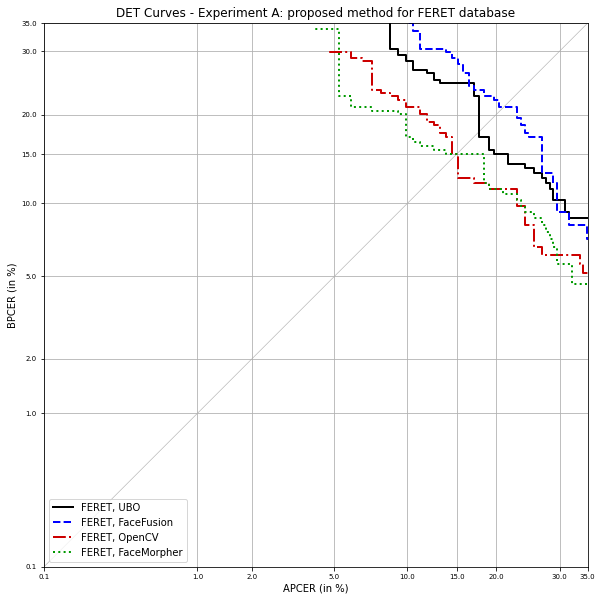

D-EER:
- FERET, UBO (exp n°26) -> 17.763%
- FERET, FaceFusion (exp n°41) -> 20.395%
- FERET, OpenCV (exp n°60) -> 15.132%
- FERET, FaceMorpher (exp n°61) -> 13.816%


In [40]:
# FERET
to_compare = [
    ('26','FERET, UBO'),
    ('41','FERET, FaceFusion'),
    ('60','FERET, OpenCV'),
    ('61','FERET, FaceMorpher')
]
deer_dict = get_DET_comparing(to_compare, 'Experiment A: proposed method for FERET database', figsize=(10,10), ticks=more_ticks, limits=[min(more_ticks),max(more_ticks)])
print_deer(deer_dict, to_compare)

**FRGC, UBO**

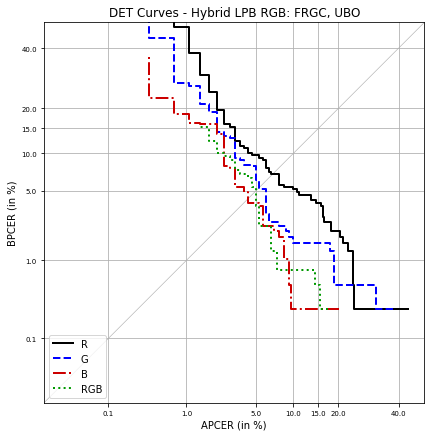

D-EER:
-  (exp n°37bis) -> 4.965%


In [35]:
to_compare = [('37bis','')]
more_ticks=[1e-3, 1e-2, 5e-2, 10e-2, 15e-2, 20e-2, 40e-2]
deer_dict = get_DET_comparing(to_compare, 'Hybrid LPB RGB: FRGC, UBO', figsize=(7,7), ticks=more_ticks, showRGBfromHybrid = True)
print_deer(deer_dict, to_compare)

**FRGC, FaceFusion**

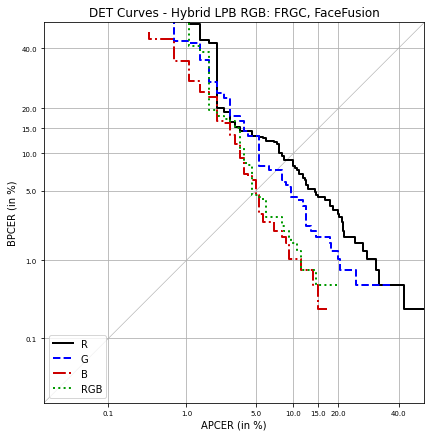

D-EER:
-  (exp n°68) -> 4.61%


In [34]:
to_compare = [('68','')]
more_ticks=[1e-3, 1e-2, 5e-2, 10e-2, 15e-2, 20e-2, 40e-2]
deer_dict = get_DET_comparing(to_compare, 'Hybrid LPB RGB: FRGC, FaceFusion', figsize=(7,7), ticks=more_ticks, showRGBfromHybrid = True)
print_deer(deer_dict, to_compare)

**FRGC, OpenCV**

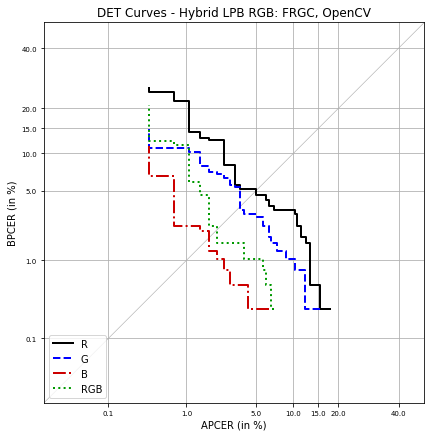

D-EER:
-  (exp n°53) -> 2.128%


In [17]:
to_compare = [('53','')]
more_ticks=[1e-3, 1e-2, 5e-2, 10e-2, 15e-2, 20e-2, 40e-2]
deer_dict = get_DET_comparing(to_compare, 'Hybrid LPB RGB: FRGC, OpenCV', figsize=(7,7), ticks=more_ticks, showRGBfromHybrid = True)
print_deer(deer_dict, to_compare)

**FRGC, FaceMorpher**

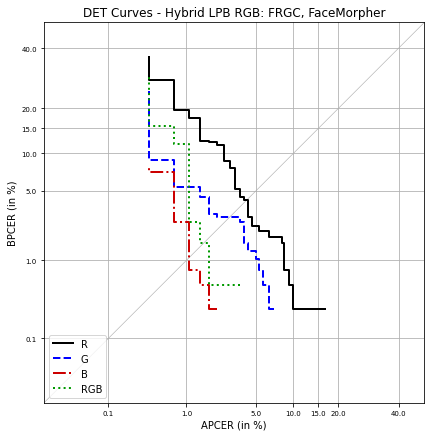

D-EER:
-  (exp n°59) -> 1.418%


In [24]:
to_compare = [('59','')]
more_ticks=[1e-3, 1e-2, 5e-2, 10e-2, 15e-2, 20e-2, 40e-2]
deer_dict = get_DET_comparing(to_compare, 'Hybrid LPB RGB: FRGC, FaceMorpher', figsize=(7,7), ticks=more_ticks, showRGBfromHybrid = True)
print_deer(deer_dict, to_compare)

**FERET, OpenCV**

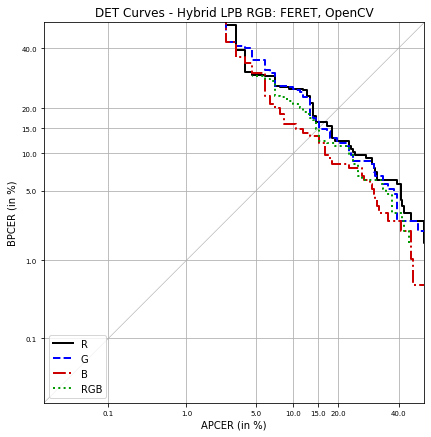

D-EER:
-  (exp n°60) -> 15.132%


In [25]:
to_compare = [('60','')]
more_ticks=[1e-3, 1e-2, 5e-2, 10e-2, 15e-2, 20e-2, 40e-2]
deer_dict = get_DET_comparing(to_compare, 'Hybrid LPB RGB: FERET, OpenCV', figsize=(7,7), ticks=more_ticks, showRGBfromHybrid = True)
print_deer(deer_dict, to_compare)

**FERET, FaceMorpher**

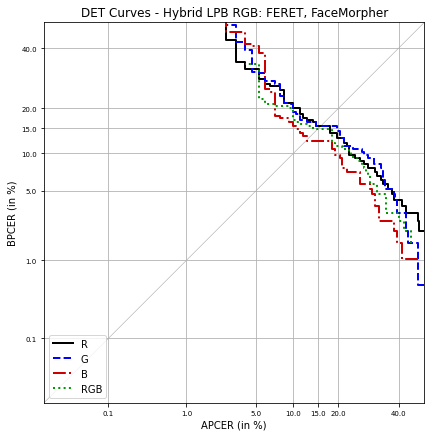

D-EER:
-  (exp n°61) -> 13.816%


In [26]:
to_compare = [('61','')]
more_ticks=[1e-3, 1e-2, 5e-2, 10e-2, 15e-2, 20e-2, 40e-2]
deer_dict = get_DET_comparing(to_compare, 'Hybrid LPB RGB: FERET, FaceMorpher', figsize=(7,7), ticks=more_ticks, showRGBfromHybrid = True)
print_deer(deer_dict, to_compare)

## Exp B-a) Different datasets, same morphing algo

**Figure for paper**

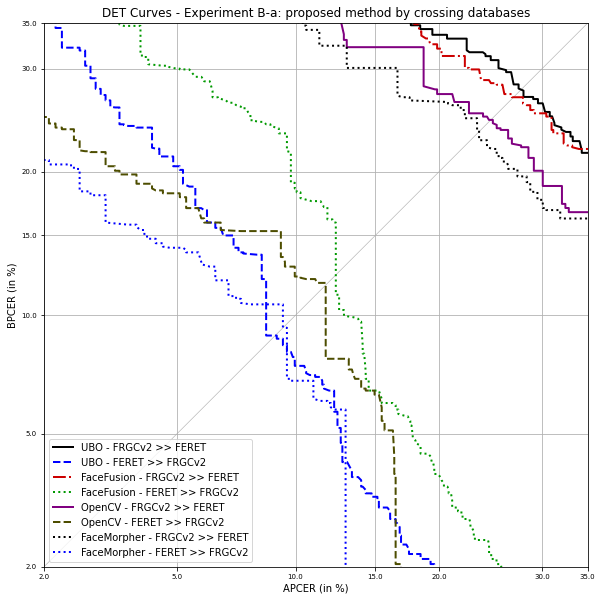

D-EER:
- UBO - FRGCv2 >> FERET (exp n°40) -> 27.778%
- UBO - FERET >> FRGCv2 (exp n°39bis) -> 9.025%
- FaceFusion - FRGCv2 >> FERET (exp n°43) -> 26.843%
- FaceFusion - FERET >> FRGCv2 (exp n°44) -> 12.344%
- OpenCV - FRGCv2 >> FERET (exp n°58) -> 24.575%
- OpenCV - FERET >> FRGCv2 (exp n°69) -> 11.722%
- FaceMorpher - FRGCv2 >> FERET (exp n°70) -> 23.629%
- FaceMorpher - FERET >> FRGCv2 (exp n°71) -> 9.336%


In [43]:
to_compare = [
    ('40','UBO - FRGCv2 >> FERET'),
    ('39bis','UBO - FERET >> FRGCv2'),
    ('43','FaceFusion - FRGCv2 >> FERET'),
    ('44','FaceFusion - FERET >> FRGCv2'),
    ('58','OpenCV - FRGCv2 >> FERET'),
    ('69','OpenCV - FERET >> FRGCv2'),
    ('70','FaceMorpher - FRGCv2 >> FERET'),
    ('71','FaceMorpher - FERET >> FRGCv2')
]
more_ticks=[2e-2, 5e-2, 10e-2, 15e-2, 20e-2, 30e-2, 35e-2]
deer_dict = get_DET_comparing(to_compare, 'Experiment B-a: proposed method by crossing databases', figsize=(10,10), ticks=more_ticks, limits=[min(more_ticks),max(more_ticks)])
print_deer(deer_dict, to_compare)

**UBO**

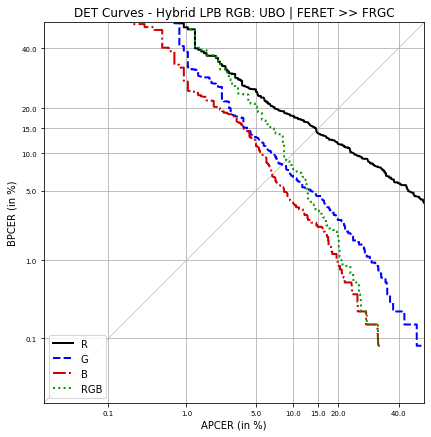

D-EER:
-  (exp n°39bis) -> 9.025%


In [4]:
to_compare = [('39bis','')]
more_ticks=[1e-3, 1e-2, 5e-2, 10e-2, 15e-2, 20e-2, 40e-2]
deer_dict = get_DET_comparing(to_compare, 'Hybrid LPB RGB: UBO | FERET >> FRGC', figsize=(7,7), ticks=more_ticks, showRGBfromHybrid = True)
print_deer(deer_dict, to_compare)

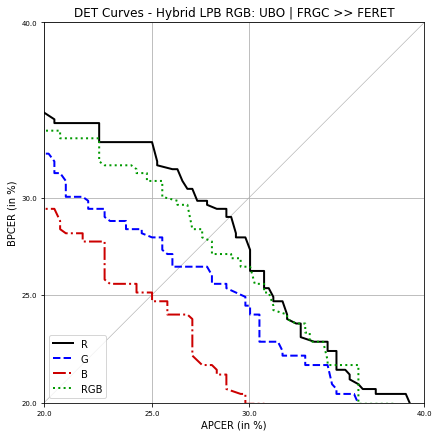

D-EER:
-  (exp n°40) -> 27.778%


In [6]:
to_compare = [('40','')]
more_ticks=[20e-2,  25e-2,  30e-2, 40e-2]
deer_dict = get_DET_comparing(to_compare, 'Hybrid LPB RGB: UBO | FRGC >> FERET', figsize=(7,7), ticks=more_ticks, showRGBfromHybrid = True, limits=[min(more_ticks),max(more_ticks)])
print_deer(deer_dict, to_compare)

**FaceFusion**

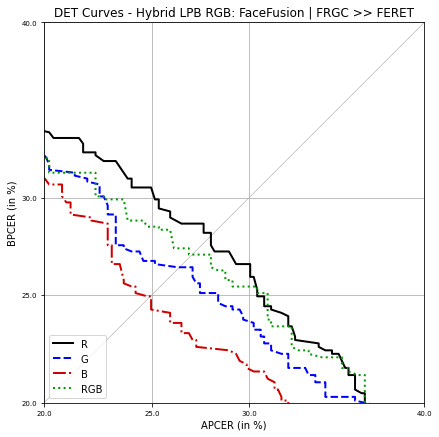

D-EER:
-  (exp n°43) -> 26.843%


In [7]:
to_compare = [('43','')]
more_ticks=[20e-2,  25e-2,  30e-2, 40e-2]
deer_dict = get_DET_comparing(to_compare, 'Hybrid LPB RGB: FaceFusion | FRGC >> FERET', figsize=(7,7), ticks=more_ticks, showRGBfromHybrid = True, limits=[min(more_ticks),max(more_ticks)])
print_deer(deer_dict, to_compare)

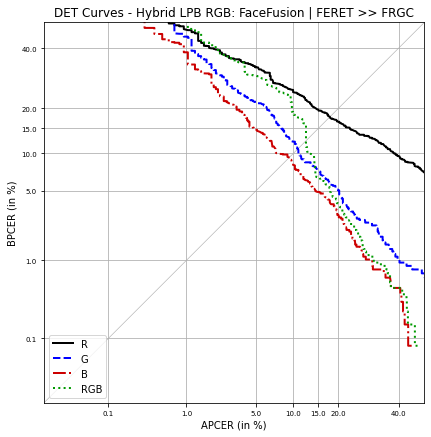

D-EER:
-  (exp n°44) -> 12.344%


In [8]:
to_compare = [('44','')]
more_ticks=[1e-3, 1e-2, 5e-2, 10e-2, 15e-2, 20e-2, 40e-2]
deer_dict = get_DET_comparing(to_compare, 'Hybrid LPB RGB: FaceFusion | FERET >> FRGC', figsize=(7,7), ticks=more_ticks, showRGBfromHybrid = True)
print_deer(deer_dict, to_compare)

**OpenCV**

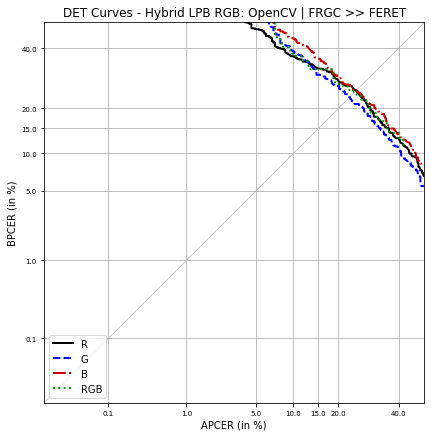

D-EER:
-  (exp n°58) -> 24.575%


In [23]:
to_compare = [('58','')]
more_ticks=[1e-3, 1e-2, 5e-2, 10e-2, 15e-2, 20e-2, 40e-2]
deer_dict = get_DET_comparing(to_compare, 'Hybrid LPB RGB: OpenCV | FRGC >> FERET', figsize=(7,7), ticks=more_ticks, showRGBfromHybrid = True)
print_deer(deer_dict, to_compare)

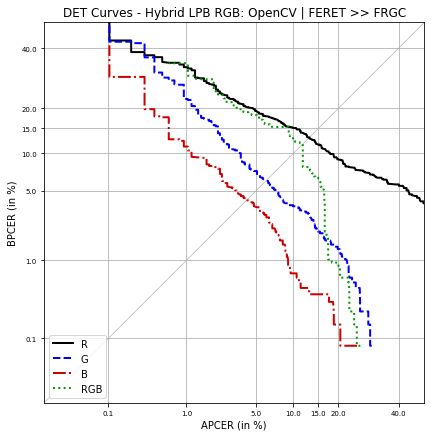

D-EER:
-  (exp n°69) -> 11.722%


In [36]:
to_compare = [('69','')]
more_ticks=[1e-3, 1e-2, 5e-2, 10e-2, 15e-2, 20e-2, 40e-2]
deer_dict = get_DET_comparing(to_compare, 'Hybrid LPB RGB: OpenCV | FERET >> FRGC', figsize=(7,7), ticks=more_ticks, showRGBfromHybrid = True)
print_deer(deer_dict, to_compare)

**FaceMorpher**

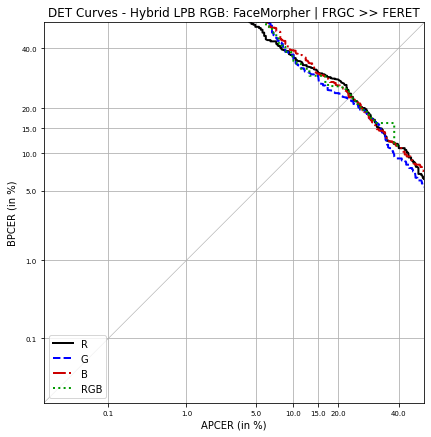

D-EER:
-  (exp n°70) -> 23.629%


In [37]:
to_compare = [('70','')]
more_ticks=[1e-3, 1e-2, 5e-2, 10e-2, 15e-2, 20e-2, 40e-2]
deer_dict = get_DET_comparing(to_compare, 'Hybrid LPB RGB: FaceMorpher | FRGC >> FERET', figsize=(7,7), ticks=more_ticks, showRGBfromHybrid = True)
print_deer(deer_dict, to_compare)

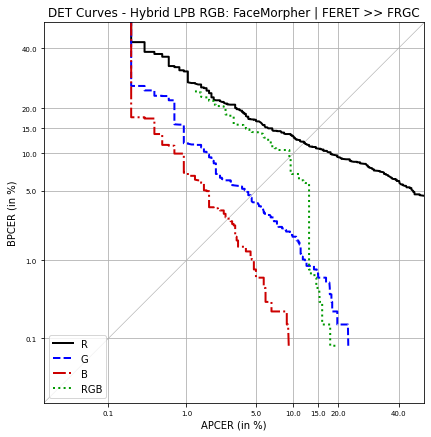

D-EER:
-  (exp n°71) -> 9.336%


In [38]:
to_compare = [('71','')]
more_ticks=[1e-3, 1e-2, 5e-2, 10e-2, 15e-2, 20e-2, 40e-2]
deer_dict = get_DET_comparing(to_compare, 'Hybrid LPB RGB: FaceMorpher | FERET >> FRGC', figsize=(7,7), ticks=more_ticks, showRGBfromHybrid = True)
print_deer(deer_dict, to_compare)

## Exp B-b) Same datasets, different morphing algo

**FRGC database**

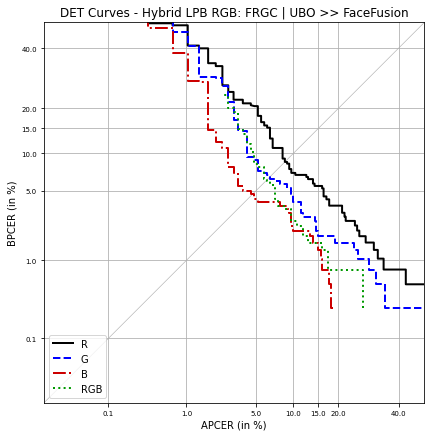

D-EER:
-  (exp n°45) -> 6.207%


In [9]:
to_compare = [('45','')]
more_ticks=[1e-3, 1e-2, 5e-2, 10e-2, 15e-2, 20e-2, 40e-2]
deer_dict = get_DET_comparing(to_compare, 'Hybrid LPB RGB: FRGC | UBO >> FaceFusion', figsize=(7,7), ticks=more_ticks, showRGBfromHybrid = True)
print_deer(deer_dict, to_compare)

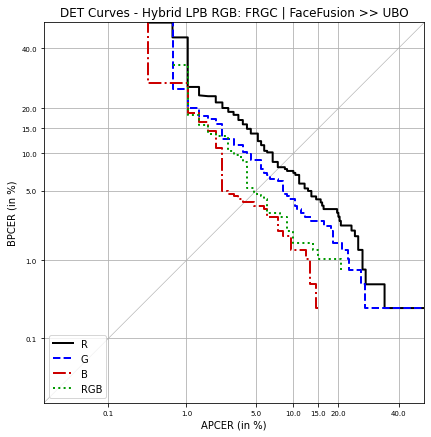

D-EER:
-  (exp n°46) -> 4.828%


In [10]:
to_compare = [('46','')]
more_ticks=[1e-3, 1e-2, 5e-2, 10e-2, 15e-2, 20e-2, 40e-2]
deer_dict = get_DET_comparing(to_compare, 'Hybrid LPB RGB: FRGC | FaceFusion >> UBO', figsize=(7,7), ticks=more_ticks, showRGBfromHybrid = True)
print_deer(deer_dict, to_compare)

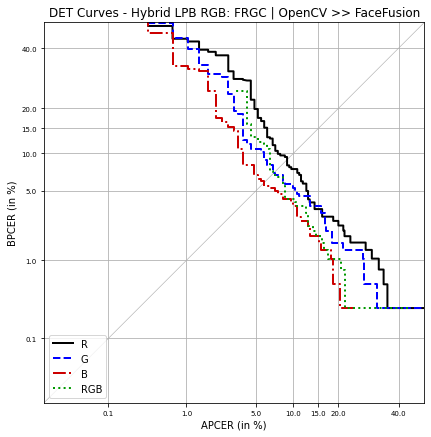

D-EER:
-  (exp n°56) -> 6.897%


In [21]:
to_compare = [('56','')]
more_ticks=[1e-3, 1e-2, 5e-2, 10e-2, 15e-2, 20e-2, 40e-2]
deer_dict = get_DET_comparing(to_compare, 'Hybrid LPB RGB: FRGC | OpenCV >> FaceFusion', figsize=(7,7), ticks=more_ticks, showRGBfromHybrid = True)
print_deer(deer_dict, to_compare)

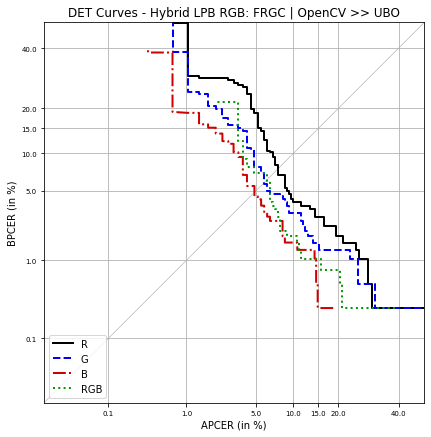

D-EER:
-  (exp n°57) -> 6.207%


In [22]:
to_compare = [('57','')]
more_ticks=[1e-3, 1e-2, 5e-2, 10e-2, 15e-2, 20e-2, 40e-2]
deer_dict = get_DET_comparing(to_compare, 'Hybrid LPB RGB: FRGC | OpenCV >> UBO', figsize=(7,7), ticks=more_ticks, showRGBfromHybrid = True)
print_deer(deer_dict, to_compare)

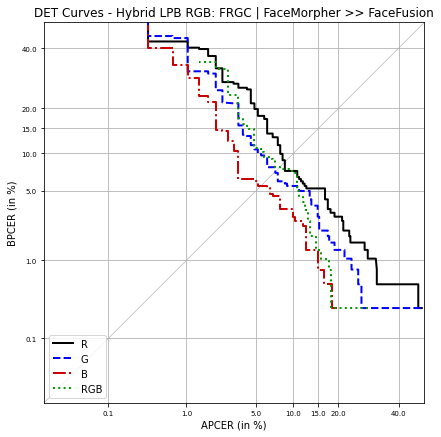

D-EER:
-  (exp n°66) -> 7.931%


In [31]:
to_compare = [('66','')]
more_ticks=[1e-3, 1e-2, 5e-2, 10e-2, 15e-2, 20e-2, 40e-2]
deer_dict = get_DET_comparing(to_compare, 'Hybrid LPB RGB: FRGC | FaceMorpher >> FaceFusion', figsize=(7,7), ticks=more_ticks, showRGBfromHybrid = True)
print_deer(deer_dict, to_compare)

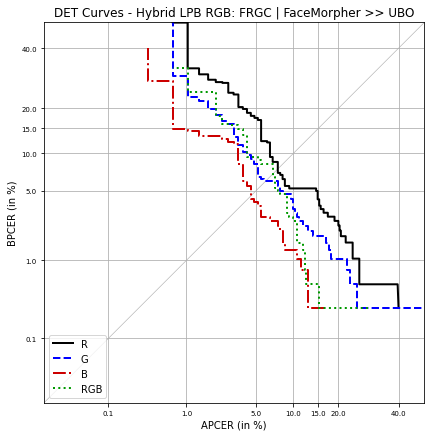

D-EER:
-  (exp n°67) -> 6.897%


In [32]:
to_compare = [('67','')]
more_ticks=[1e-3, 1e-2, 5e-2, 10e-2, 15e-2, 20e-2, 40e-2]
deer_dict = get_DET_comparing(to_compare, 'Hybrid LPB RGB: FRGC | FaceMorpher >> UBO', figsize=(7,7), ticks=more_ticks, showRGBfromHybrid = True)
print_deer(deer_dict, to_compare)

**FERET database**

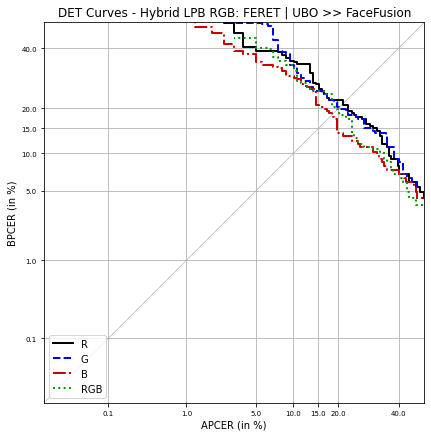

D-EER:
-  (exp n°47) -> 19.497%


In [11]:
to_compare = [('47','')]
more_ticks=[1e-3, 1e-2, 5e-2, 10e-2, 15e-2, 20e-2, 40e-2]
deer_dict = get_DET_comparing(to_compare, 'Hybrid LPB RGB: FERET | UBO >> FaceFusion', figsize=(7,7), ticks=more_ticks, showRGBfromHybrid = True)
print_deer(deer_dict, to_compare)

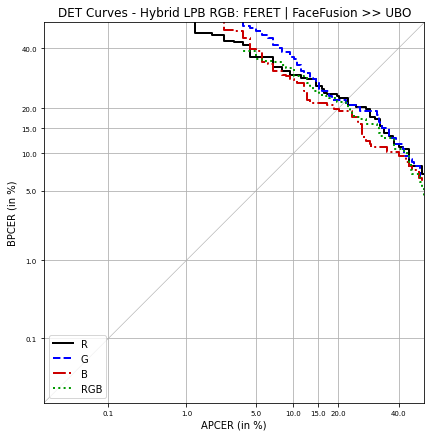

D-EER:
-  (exp n°48) -> 22.013%


In [12]:
to_compare = [('48','')]
more_ticks=[1e-3, 1e-2, 5e-2, 10e-2, 15e-2, 20e-2, 40e-2]
deer_dict = get_DET_comparing(to_compare, 'Hybrid LPB RGB: FERET | FaceFusion >> UBO', figsize=(7,7), ticks=more_ticks, showRGBfromHybrid = True)
print_deer(deer_dict, to_compare)

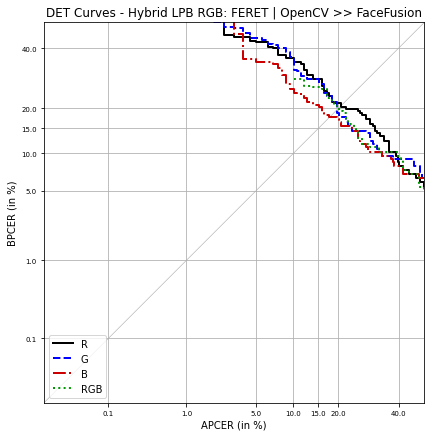

D-EER:
-  (exp n°62) -> 19.497%


In [27]:
to_compare = [('62','')]
more_ticks=[1e-3, 1e-2, 5e-2, 10e-2, 15e-2, 20e-2, 40e-2]
deer_dict = get_DET_comparing(to_compare, 'Hybrid LPB RGB: FERET | OpenCV >> FaceFusion', figsize=(7,7), ticks=more_ticks, showRGBfromHybrid = True)
print_deer(deer_dict, to_compare)

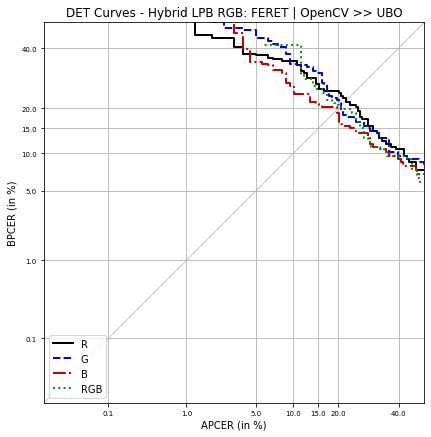

D-EER:
-  (exp n°63) -> 20.126%


In [28]:
to_compare = [('63','')]
more_ticks=[1e-3, 1e-2, 5e-2, 10e-2, 15e-2, 20e-2, 40e-2]
deer_dict = get_DET_comparing(to_compare, 'Hybrid LPB RGB: FERET | OpenCV >> UBO', figsize=(7,7), ticks=more_ticks, showRGBfromHybrid = True)
print_deer(deer_dict, to_compare)

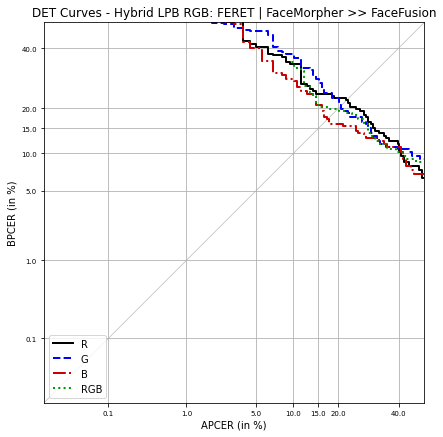

D-EER:
-  (exp n°64) -> 20.126%


In [29]:
to_compare = [('64','')]
more_ticks=[1e-3, 1e-2, 5e-2, 10e-2, 15e-2, 20e-2, 40e-2]
deer_dict = get_DET_comparing(to_compare, 'Hybrid LPB RGB: FERET | FaceMorpher >> FaceFusion', figsize=(7,7), ticks=more_ticks, showRGBfromHybrid = True)
print_deer(deer_dict, to_compare)

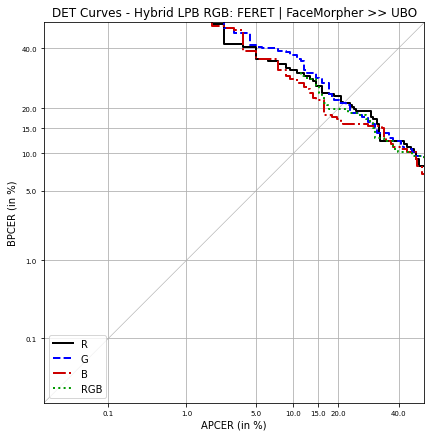

D-EER:
-  (exp n°65) -> 17.61%


In [30]:
to_compare = [('65','')]
more_ticks=[1e-3, 1e-2, 5e-2, 10e-2, 15e-2, 20e-2, 40e-2]
deer_dict = get_DET_comparing(to_compare, 'Hybrid LPB RGB: FERET | FaceMorpher >> UBO', figsize=(7,7), ticks=more_ticks, showRGBfromHybrid = True)
print_deer(deer_dict, to_compare)

## Exp B-c) Different datasets, different morphing algos

**Figure for paper**

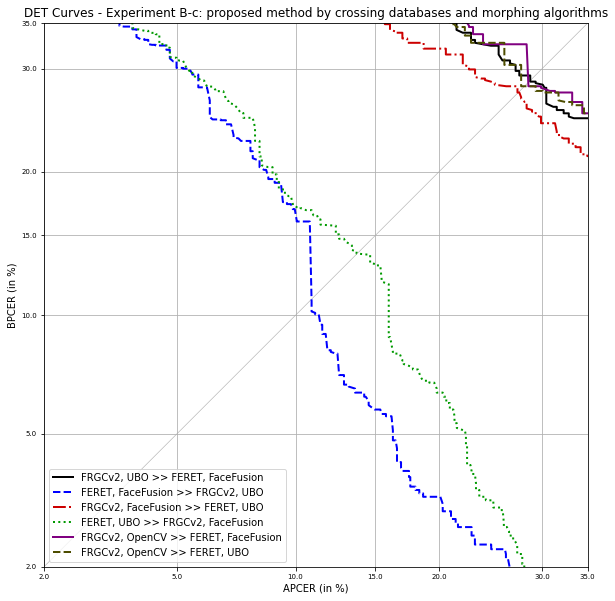

D-EER:
- FRGCv2, UBO >> FERET, FaceFusion (exp n°49) -> 28.733%
- FERET, FaceFusion >> FRGCv2, UBO (exp n°50) -> 10.788%
- FRGCv2, FaceFusion >> FERET, UBO (exp n°51) -> 27.41%
- FERET, UBO >> FRGCv2, FaceFusion (exp n°52) -> 13.693%
- FRGCv2, OpenCV >> FERET, FaceFusion (exp n°54) -> 28.355%
- FRGCv2, OpenCV >> FERET, UBO (exp n°55) -> 27.788%


In [42]:
to_compare = [
    ('49','FRGCv2, UBO >> FERET, FaceFusion'),
    ('50','FERET, FaceFusion >> FRGCv2, UBO'),
    ('51','FRGCv2, FaceFusion >> FERET, UBO'),
    ('52','FERET, UBO >> FRGCv2, FaceFusion'),
    ('54','FRGCv2, OpenCV >> FERET, FaceFusion'),
    ('55','FRGCv2, OpenCV >> FERET, UBO')
]
more_ticks=[2e-2, 5e-2, 10e-2, 15e-2, 20e-2, 30e-2, 35e-2]
deer_dict = get_DET_comparing(to_compare, 'Experiment B-c: proposed method by crossing databases and morphing algorithms', figsize=(10,10), ticks=more_ticks, limits=[min(more_ticks),max(more_ticks)])
print_deer(deer_dict, to_compare)

**Details for each configuration**

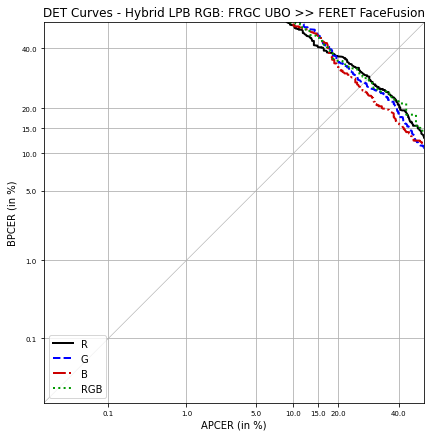

D-EER:
-  (exp n°49) -> 28.733%


In [13]:
to_compare = [('49','')]
more_ticks=[1e-3, 1e-2, 5e-2, 10e-2, 15e-2, 20e-2, 40e-2]
deer_dict = get_DET_comparing(to_compare, 'Hybrid LPB RGB: FRGC UBO >> FERET FaceFusion', figsize=(7,7), ticks=more_ticks, showRGBfromHybrid = True)
print_deer(deer_dict, to_compare)

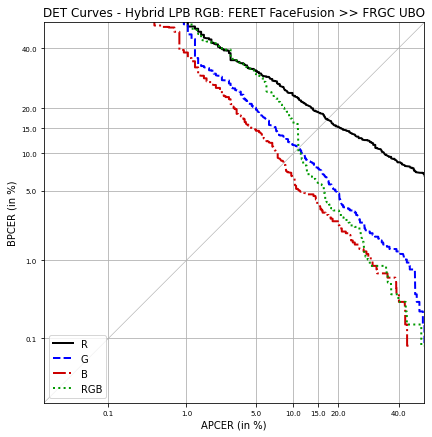

D-EER:
-  (exp n°50) -> 10.788%


In [14]:
to_compare = [('50','')]
more_ticks=[1e-3, 1e-2, 5e-2, 10e-2, 15e-2, 20e-2, 40e-2]
deer_dict = get_DET_comparing(to_compare, 'Hybrid LPB RGB: FERET FaceFusion >> FRGC UBO', figsize=(7,7), ticks=more_ticks, showRGBfromHybrid = True)
print_deer(deer_dict, to_compare)

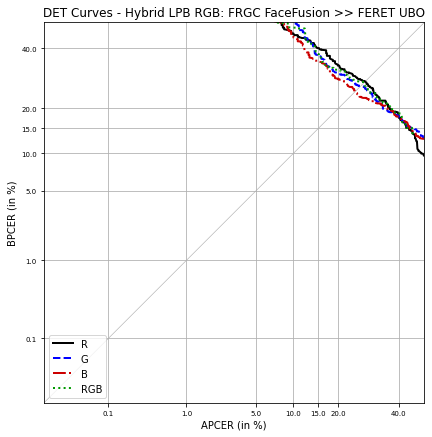

D-EER:
-  (exp n°51) -> 27.41%


In [15]:
to_compare = [('51','')]
more_ticks=[1e-3, 1e-2, 5e-2, 10e-2, 15e-2, 20e-2, 40e-2]
deer_dict = get_DET_comparing(to_compare, 'Hybrid LPB RGB: FRGC FaceFusion >> FERET UBO', figsize=(7,7), ticks=more_ticks, showRGBfromHybrid = True)
print_deer(deer_dict, to_compare)

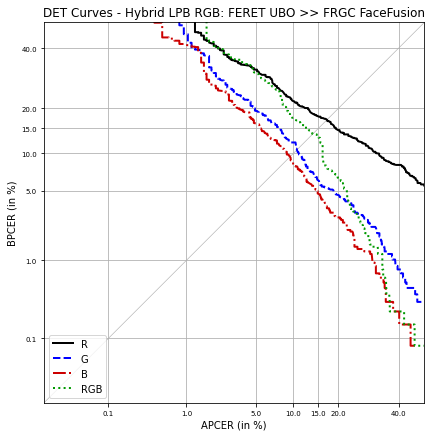

D-EER:
-  (exp n°52) -> 13.693%


In [16]:
to_compare = [('52','')]
more_ticks=[1e-3, 1e-2, 5e-2, 10e-2, 15e-2, 20e-2, 40e-2]
deer_dict = get_DET_comparing(to_compare, 'Hybrid LPB RGB: FERET UBO >> FRGC FaceFusion', figsize=(7,7), ticks=more_ticks, showRGBfromHybrid = True)
print_deer(deer_dict, to_compare)

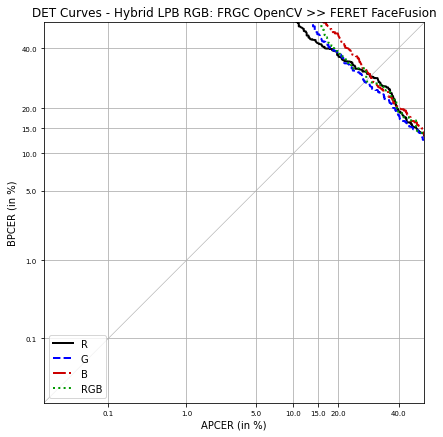

D-EER:
-  (exp n°54) -> 28.355%


In [18]:
to_compare = [('54','')]
more_ticks=[1e-3, 1e-2, 5e-2, 10e-2, 15e-2, 20e-2, 40e-2]
deer_dict = get_DET_comparing(to_compare, 'Hybrid LPB RGB: FRGC OpenCV >> FERET FaceFusion', figsize=(7,7), ticks=more_ticks, showRGBfromHybrid = True)
print_deer(deer_dict, to_compare)

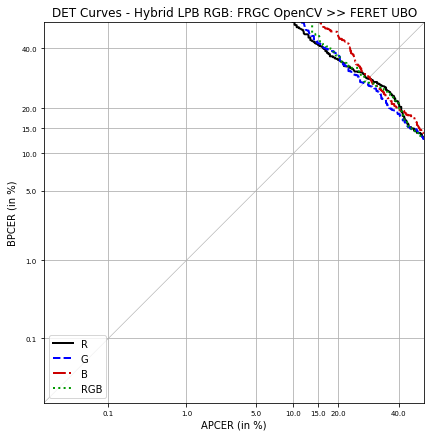

D-EER:
-  (exp n°55) -> 27.788%


In [19]:
to_compare = [('55','')]
more_ticks=[1e-3, 1e-2, 5e-2, 10e-2, 15e-2, 20e-2, 40e-2]
deer_dict = get_DET_comparing(to_compare, 'Hybrid LPB RGB: FRGC OpenCV >> FERET UBO', figsize=(7,7), ticks=more_ticks, showRGBfromHybrid = True)
print_deer(deer_dict, to_compare)

# THE END.